In [175]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [2]:
os.getcwd()

'C:\\Users\\brenden.lemay'

In [3]:
os.chdir('./Downloads/')

In [4]:
os.getcwd()

'C:\\Users\\brenden.lemay\\Downloads'

# First things first, let's read in the data

In [64]:
sheet1= pd.read_excel('Copy of [Brenden J. Lemay] Interview Dataset.xlsx', sheet_name = 'Dataset_1')
#sheet2 = pd.read_excel('Copy of [Brenden J. Lemay] Interview Dataset.xlsx', sheet_name = 'Dataset_2')

In [65]:
sheet1.head()

,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category
0,2019-03-29,Call,2019-03-29 16:45:37,outbound,2019-03-29 16:45:37,NaN,NaN,NaT,NaN,NaN
1,2019-03-29,Call,2019-03-29 15:22:13,outbound,2019-03-29 15:22:13,00:00:19,NaN,NaT,NaN,NaN
2,2019-03-29,Call,2019-03-29 09:16:10,outbound,2019-03-29 09:16:10,00:01:02,NaN,NaT,NaN,NaN
3,2019-03-29,Call,2019-03-29 15:42:41,outbound,2019-03-29 15:42:41,00:00:27,NaN,NaT,NaN,NaN
4,2019-03-29,Call,2019-03-29 11:54:56,outbound,2019-03-29 11:54:56,NaN,NaN,NaT,NaN,NaN


In [209]:
sheet1['Abandoned'] = sheet1['Abandon time'].apply(lambda x:1 if x!= pd.NaT else 0)

In [210]:
sheet1.head()

,level_0,index,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category,month,Abandoned
0,0,0,2019-03-29,Call,2019-03-29 16:45:37,outbound,2019-03-29 16:45:37,NaN,NaN,NaT,NaN,NaN,3,1
1,1,1,2019-03-29,Call,2019-03-29 15:22:13,outbound,2019-03-29 15:22:13,00:00:19,NaN,NaT,NaN,NaN,3,1
2,2,2,2019-03-29,Call,2019-03-29 09:16:10,outbound,2019-03-29 09:16:10,00:01:02,NaN,NaT,NaN,NaN,3,1
3,3,3,2019-03-29,Call,2019-03-29 15:42:41,outbound,2019-03-29 15:42:41,00:00:27,NaN,NaT,NaN,NaN,3,1
4,4,4,2019-03-29,Call,2019-03-29 11:54:56,outbound,2019-03-29 11:54:56,NaN,NaN,NaT,NaN,NaN,3,1


# Now let's filter out the rows wherein Accept time and Abandon time are both null

In [187]:
sheet1=sheet1.dropna(subset=['Accept time','Abandon time'], how='all').reset_index()

In [188]:
# Prior to filtering out missing accept times and abandon times
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83089 entries, 0 to 83088
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   level_0                            83089 non-null  int64         
 1   index                              83089 non-null  int64         
 2   Period                             83089 non-null  datetime64[ns]
 3   Type                               83089 non-null  object        
 4   Create time                        83089 non-null  datetime64[ns]
 5   Direction                          81525 non-null  object        
 6   Accept time                        52245 non-null  object        
 7   Total time processing transaction  51978 non-null  object        
 8   Total time on post processing      50206 non-null  object        
 9   Abandon time                       30844 non-null  datetime64[ns]
 10  IVR Treatment Time                

In [67]:
# After to filtering out missing accept times and abandon times
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83089 entries, 0 to 83088
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   index                              83089 non-null  int64         
 1   Period                             83089 non-null  datetime64[ns]
 2   Type                               83089 non-null  object        
 3   Create time                        83089 non-null  datetime64[ns]
 4   Direction                          81525 non-null  object        
 5   Accept time                        52245 non-null  object        
 6   Total time processing transaction  51978 non-null  object        
 7   Total time on post processing      50206 non-null  object        
 8   Abandon time                       30844 non-null  datetime64[ns]
 9   IVR Treatment Time                 82706 non-null  object        
 10  Tagged category                   

In [40]:
sheet1.columns

Index(['index', 'Period', 'Type', 'Create time', 'Direction', 'Accept time',
       'Total time processing transaction', 'Total time on post processing',
       'Abandon time', 'IVR Treatment Time', 'Tagged category'],
      dtype='object')

In [87]:
# Not going to use the below code since it removes the datetime portion
no_jan = sheet1.set_index(pd.DatetimeIndex(sheet1['Period']))

In [88]:
#df = df[~df.index.month.isin([12, 1, 2])]
no_jan = no_jan[~no_jan.index.month.isin([1])]

In [94]:
jan = sheet1.set_index(pd.DatetimeIndex(sheet1['Period']))
jan = jan[jan.index.month.isin([1])]

In [89]:
no_jan.index.month.unique()

Int64Index([3, 4, 2], dtype='int64', name='Period')

In [90]:
no_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81386 entries, 2019-03-29 to 2019-04-27
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   index                              81386 non-null  int64         
 1   Period                             81386 non-null  datetime64[ns]
 2   Type                               81386 non-null  object        
 3   Create time                        81386 non-null  datetime64[ns]
 4   Direction                          79822 non-null  object        
 5   Accept time                        50968 non-null  object        
 6   Total time processing transaction  50705 non-null  object        
 7   Total time on post processing      48929 non-null  object        
 8   Abandon time                       30418 non-null  datetime64[ns]
 9   IVR Treatment Time                 81003 non-null  object        
 10  Tagged category  

In [114]:
feb = sheet1.set_index(pd.DatetimeIndex(sheet1['Period']))
feb = feb[feb.index.month.isin([2])]

In [112]:
mar = sheet1.set_index(pd.DatetimeIndex(sheet1['Period']))
mar = mar[mar.index.month.isin([3])]

In [113]:
apr = sheet1.set_index(pd.DatetimeIndex(sheet1['Period']))
apr = apr[apr.index.month.isin([4])]

In [63]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83089 entries, 0 to 83088
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   index                              83089 non-null  int64         
 1   Period                             83089 non-null  datetime64[ns]
 2   Type                               83089 non-null  object        
 3   Create time                        83089 non-null  datetime64[ns]
 4   Direction                          81525 non-null  object        
 5   Accept time                        52245 non-null  object        
 6   Total time processing transaction  51978 non-null  object        
 7   Total time on post processing      50206 non-null  object        
 8   Abandon time                       30844 non-null  datetime64[ns]
 9   IVR Treatment Time                 82706 non-null  object        
 10  Tagged category                   

In [141]:
months_3 = sheet1.set_index(pd.DatetimeIndex(sheet1['Period'])).drop(['index','Period'], axis=1)
months_3.head()

,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category
Period,,,,,,,,,
2019-03-29,Call,2019-03-29 16:45:37,outbound,2019-03-29 16:45:37,NaN,NaN,NaT,NaN,NaN
2019-03-29,Call,2019-03-29 15:22:13,outbound,2019-03-29 15:22:13,00:00:19,NaN,NaT,NaN,NaN
2019-03-29,Call,2019-03-29 09:16:10,outbound,2019-03-29 09:16:10,00:01:02,NaN,NaT,NaN,NaN
2019-03-29,Call,2019-03-29 15:42:41,outbound,2019-03-29 15:42:41,00:00:27,NaN,NaT,NaN,NaN
2019-03-29,Call,2019-03-29 11:54:56,outbound,2019-03-29 11:54:56,NaN,NaN,NaT,NaN,NaN


In [147]:
sheet1['month']=pd.DatetimeIndex(sheet1.Period).month
sheet1.head()

,index,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category,month
0,0,2019-03-29,Call,2019-03-29 16:45:37,outbound,2019-03-29 16:45:37,NaN,NaN,NaT,NaN,NaN,3
1,1,2019-03-29,Call,2019-03-29 15:22:13,outbound,2019-03-29 15:22:13,00:00:19,NaN,NaT,NaN,NaN,3
2,2,2019-03-29,Call,2019-03-29 09:16:10,outbound,2019-03-29 09:16:10,00:01:02,NaN,NaT,NaN,NaN,3
3,3,2019-03-29,Call,2019-03-29 15:42:41,outbound,2019-03-29 15:42:41,00:00:27,NaN,NaT,NaN,NaN,3
4,4,2019-03-29,Call,2019-03-29 11:54:56,outbound,2019-03-29 11:54:56,NaN,NaN,NaT,NaN,NaN,3


In [119]:
sheet1['Tagged category'].unique()

array([nan, 'Other > Calls for other babylon departments',
       'Patient > Appointments > Requires further medical assistance',
       'Prescription – pharmacy call',
       'Patient > Appointments > Book F2F Appointment',
       'Patient > Registrations > Chasing registration: in queue',
       'Prescription - issue', 'Info about the service',
       'Provider > Prescription > Not delivered to pharmacy',
       'Patient > Appointments > Reschedule Appointment',
       'Patient > Appointments > Cancelled appointment',
       'Patient > Feedback > Feature requests',
       'Patient > Registrations > Chasing registration: query about info',
       'Patient > Appointments > Book Digital Appointment',
       'Patient > Appointments > GP late',
       'Prescription – not at pharmacy',
       'Patient > Registrations > Delete account (deregister / cancel)',
       'Patient > Appointments > Request for vaccinations',
       'Patient > Account > Update Profile',
       'Patient > Registratio

In [13]:
sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   appt_date        3130 non-null   datetime64[ns]
 1   modality         3130 non-null   object        
 2   medium           3130 non-null   object        
 3   consultant_type  3130 non-null   object        
 4   state            3130 non-null   object        
 5   count_appts      3130 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 146.8+ KB


# Let's take a closer look at the data

In [123]:
sheet1.to_csv('babylon_data.csv')

In [125]:
sheet1.columns

Index(['index', 'Period', 'Type', 'Create time', 'Direction', 'Accept time',
       'Total time processing transaction', 'Total time on post processing',
       'Abandon time', 'IVR Treatment Time', 'Tagged category'],
      dtype='object')

In [172]:
def percent_abandonment_rate(data):
    abandoned_calls=data['Abandon time'].notnull().sum()
    accepted_calls = data['Accept time'].notnull().sum()
    abandonment_percent = abandoned_calls/(abandoned_calls + accepted_calls)
    return(abandonment_percent)


# After subsetting the data into two groups, January information and February through April, we can begin to test our first hypothesis

In [192]:
# Overall information about abandoned calls`
abandoned_calls = sheet1['Abandon time'].notnull().sum()
accepted_calls = sheet1['Accept time'].notnull().sum()
abandoned_calls_rate = abandoned_calls/(abandoned_calls + accepted_calls)
print(abandoned_calls_rate)

0.37121640650386933


In [202]:
# January specific information
jan_abandoned_calls = jan['Abandon time'].notnull().sum()
jan_accepted_calls = jan['Accept time'].notnull().sum()
jan_percent_abandonment_rate = jan_abandoned_calls/(jan_abandoned_calls + jan_accepted_calls)
print('January abandoned calls ', jan_abandoned_calls)
print(jan_percent_abandonment_rate)
print(len(jan))

January abandoned calls  426
0.2501467997651204
1703


In [196]:
# February through April information
no_jan_abandoned_calls = no_jan['Abandon time'].notnull().sum()
no_jan_accepted_calls = no_jan['Accept time'].notnull().sum()
no_jan_percent_abandonment_rate = no_jan_abandoned_calls/(no_jan_abandoned_calls + no_jan_accepted_calls)
print('February through April abandoned calls ', no_jan_abandoned_calls)
print(no_jan_percent_abandonment_rate)

February through April abandoned calls  30418
0.37374978497530287


In [205]:
# February information
feb_abandoned_calls = feb['Abandon time'].notnull().sum()
feb_accepted_calls = feb['Accept time'].notnull().sum()
feb_percent_abandonment_rate = feb_abandoned_calls/(feb_abandoned_calls + feb_accepted_calls)
print('February abandoned calls ', feb_abandoned_calls)
print(feb_percent_abandonment_rate)
print(len(feb))


February abandoned calls  6325
0.2722889491583796
23229


In [206]:
feb.head()

,index,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category
Period,,,,,,,,,,,
2019-02-08,20236,2019-02-08,Call,2019-02-08 19:42:09,inbound,NaN,NaN,NaN,2019-02-08 19:42:09.000,00:00:00,NaN
2019-02-04,20238,2019-02-04,Call,2019-02-04 11:23:47,outbound,NaN,NaN,NaN,2019-02-04 11:25:33.800,00:00:00,NaN
2019-02-28,20239,2019-02-28,Call,2019-02-28 14:49:02,inbound,NaN,NaN,NaN,2019-02-28 14:51:41.000,00:00:00,NaN
2019-02-24,20240,2019-02-24,Call,2019-02-24 10:44:44,outbound,43520.5,00:03:41,00:02:00,NaT,00:00:00,NaN
2019-02-28,20245,2019-02-28,Call,2019-02-28 13:22:58,outbound,43524.6,00:00:58,00:00:00,NaT,00:00:00,NaN


In [200]:
# March information
mar_abandoned_calls = mar['Abandon time'].notnull().sum()
mar_accepted_calls = mar['Accept time'].notnull().sum()
mar_percent_abandonment_rate = mar_abandoned_calls/(mar_abandoned_calls + mar_accepted_calls)
print('March abandoned calls ', mar_abandoned_calls)
print(mar_percent_abandonment_rate)
print(len(mar))

March abandoned calls  9050
0.35494371886888654
25497


In [199]:
# April information
apr_abandoned_calls = apr['Abandon time'].notnull().sum()
apr_accepted_calls = apr['Accept time'].notnull().sum()
apr_percent_abandonment_rate = apr_abandoned_calls/(apr_abandoned_calls + apr_accepted_calls)
print('April abandoned calls ', apr_abandoned_calls)
print(apr_percent_abandonment_rate)
print(len(apr))

April abandoned calls  15043
0.46059399877526025
32660


In [198]:
# Overall percent change from January to end of April
feb_to_march_percent_diff_change = no_jan_percent_abandonment_rate-jan_percent_abandonment_rate/jan_percent_abandonment_rate
print('Overall percent change from January to end of April ',np.abs(percent_diff_change))

Overall percent change from January to end of April  0.6262502150246971


# It looks like there is about a 63% uptick in the abandonment rate. Let's see if this increase is statistically significant (not likely to be due to random chance)


### We assume the % Abadonment Rate is poissonly distributed therefore the population is described by lambda

### Let H0 = lambda >= 25.01%
### Let H1 = lambda < 25.01%


In [101]:
jan_mean_rate = jan_abandoned_calls/len(jan)
jan_mean_rate

0.2501467997651204

In [194]:
all_samples_poisson = np.random.poisson(abandoned_calls_rate,size=10000)
print('Poisson mean:    ', np.mean(all_samples_poisson))
print('Poisson standard deviation:    ', np.std(all_samples_poisson))
print('Poisson variance:    ', np.var(all_samples_poisson))

Poisson mean:     0.374
Poisson standard deviation:     0.6145925479535201
Poisson variance:     0.377724


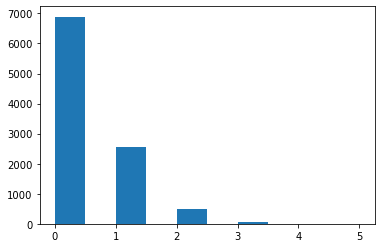

In [195]:
plt.hist(all_samples_poisson)
plt.show()

In [130]:
jan_samples_poisson = np.random.poisson(jan_mean_rate, size=10000)
print('Poisson:    ', np.mean(jan_samples_poisson),
                    np.std(jan_samples_poisson))

Poisson:     0.2552 0.5115397931735126


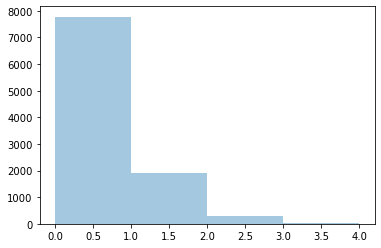

In [171]:
sns.distplot(jan_samples_poisson, bins=4, kde=False)
plt.show()

In [154]:
no_jan_samples_poisson = np.random.poisson(no_jan_percent_abandonment_rate, size=10000)
print('Poisson:    ', np.mean(no_jan_samples_poisson),
                    np.std(no_jan_samples_poisson))

Poisson:     0.3719 0.6029845686251017


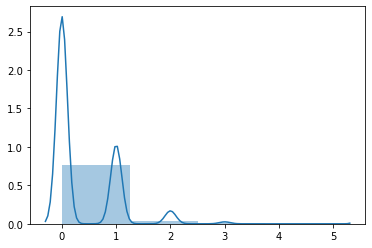

In [169]:
sns.distplot(no_jan_samples_poisson, bins=4, kde=True)
plt.show()

In [176]:
sheet1.
tstat, pvalue = ttest_rel(feb_percent_abandonment_rate,mar_percent_abandonment_rate)
print(tstat, pvalue)

nan nan


C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Let's get a day and time of day breakdown

In [219]:
import datetime
from datetime import datetime
from datetime import date
sheet1['weekday']= sheet1['Period'].dt.dayofweek
abandoned = sheet1[sheet1['Abandon time'].notnull()]
abandoned.head()

,level_0,index,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category,month,Abandoned,weekday
20235,20235,20235,2019-03-15,Call,2019-03-15 21:28:11,inbound,NaN,NaN,NaN,2019-03-15 21:28:28.400,00:00:00,NaN,3,1,4
20236,20236,20236,2019-02-08,Call,2019-02-08 19:42:09,inbound,NaN,NaN,NaN,2019-02-08 19:42:09.000,00:00:00,NaN,2,1,4
20237,20237,20237,2019-03-16,Call,2019-03-16 07:21:46,inbound,NaN,NaN,NaN,2019-03-16 07:24:57.400,00:00:00,NaN,3,1,5
20238,20238,20238,2019-02-04,Call,2019-02-04 11:23:47,outbound,NaN,NaN,NaN,2019-02-04 11:25:33.800,00:00:00,NaN,2,1,0
20239,20239,20239,2019-02-28,Call,2019-02-28 14:49:02,inbound,NaN,NaN,NaN,2019-02-28 14:51:41.000,00:00:00,NaN,2,1,3


In [220]:
sheet1.drop(['Abandoned'], axis=1, inplace=True)

In [227]:
sheet1['Abandoned_actual_Time']=sheet1['Abandon time'].dt.strftime('%H:%M')

In [235]:
sheet1['Abandoned_actual_Time_hour']=sheet1['Abandon time'].dt.strftime('%H')
sheet1[sheet1['Abandon time'].notnull()].head()

,level_0,index,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category,month,weekday,Abandoned_actual_Time,Abandoned_actual_Time_hour
20235,20235,20235,2019-03-15,Call,2019-03-15 21:28:11,inbound,NaN,NaN,NaN,2019-03-15 21:28:28.400,00:00:00,NaN,3,4,21:28,21
20236,20236,20236,2019-02-08,Call,2019-02-08 19:42:09,inbound,NaN,NaN,NaN,2019-02-08 19:42:09.000,00:00:00,NaN,2,4,19:42,19
20237,20237,20237,2019-03-16,Call,2019-03-16 07:21:46,inbound,NaN,NaN,NaN,2019-03-16 07:24:57.400,00:00:00,NaN,3,5,07:24,07
20238,20238,20238,2019-02-04,Call,2019-02-04 11:23:47,outbound,NaN,NaN,NaN,2019-02-04 11:25:33.800,00:00:00,NaN,2,0,11:25,11
20239,20239,20239,2019-02-28,Call,2019-02-28 14:49:02,inbound,NaN,NaN,NaN,2019-02-28 14:51:41.000,00:00:00,NaN,2,3,14:51,14


In [236]:
abandoned = sheet1[sheet1['Abandon time'].notnull()]
abandoned.head()

,level_0,index,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category,month,weekday,Abandoned_actual_Time,Abandoned_actual_Time_hour
20235,20235,20235,2019-03-15,Call,2019-03-15 21:28:11,inbound,NaN,NaN,NaN,2019-03-15 21:28:28.400,00:00:00,NaN,3,4,21:28,21
20236,20236,20236,2019-02-08,Call,2019-02-08 19:42:09,inbound,NaN,NaN,NaN,2019-02-08 19:42:09.000,00:00:00,NaN,2,4,19:42,19
20237,20237,20237,2019-03-16,Call,2019-03-16 07:21:46,inbound,NaN,NaN,NaN,2019-03-16 07:24:57.400,00:00:00,NaN,3,5,07:24,07
20238,20238,20238,2019-02-04,Call,2019-02-04 11:23:47,outbound,NaN,NaN,NaN,2019-02-04 11:25:33.800,00:00:00,NaN,2,0,11:25,11
20239,20239,20239,2019-02-28,Call,2019-02-28 14:49:02,inbound,NaN,NaN,NaN,2019-02-28 14:51:41.000,00:00:00,NaN,2,3,14:51,14


In [237]:
abandoned.to_csv('abandoned_with_time.csv')

In [241]:
abandoned.shape

(30844, 16)

In [239]:
# 0 is Monday
abandoned.groupby(['weekday']).agg('count')

,level_0,index,Period,Type,Create time,Direction,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category,month,Abandoned_actual_Time,Abandoned_actual_Time_hour
weekday,,,,,,,,,,,,,,,
0,5464,5464,5464,5464,5464,5371,0,0,0,5464,5464,0,5464,5464,5464
1,4308,4308,4308,4308,4308,4235,0,0,0,4308,4308,0,4308,4308,4308
2,1919,1919,1919,1919,1919,1884,0,0,0,1919,1919,0,1919,1919,1919
3,1395,1395,1395,1395,1395,1367,0,0,0,1395,1395,0,1395,1395,1395
4,5929,5929,5929,5929,5929,5799,0,0,0,5929,5929,0,5929,5929,5929
5,6338,6338,6338,6338,6338,6195,0,0,0,6338,6338,0,6338,6338,6338
6,5491,5491,5491,5491,5491,5379,0,0,0,5491,5491,0,5491,5491,5491


In [244]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
hour = abandoned.groupby(['Abandoned_actual_Time_hour']).agg('count')
hour.T

Abandoned_actual_Time_hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
level_0,134,55,29,30,34,26,206,790,1769,2210,2808,2981,2833,2869,2579,2357,2143,1930,1532,979,764,633,735,418
index,134,55,29,30,34,26,206,790,1769,2210,2808,2981,2833,2869,2579,2357,2143,1930,1532,979,764,633,735,418
Period,134,55,29,30,34,26,206,790,1769,2210,2808,2981,2833,2869,2579,2357,2143,1930,1532,979,764,633,735,418
Type,134,55,29,30,34,26,206,790,1769,2210,2808,2981,2833,2869,2579,2357,2143,1930,1532,979,764,633,735,418
Create time,134,55,29,30,34,26,206,790,1769,2210,2808,2981,2833,2869,2579,2357,2143,1930,1532,979,764,633,735,418
Direction,133,55,29,30,34,25,201,786,1736,2161,2752,2919,2783,2802,2534,2313,2099,1880,1501,957,748,617,721,414
Accept time,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Total time processing transaction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Total time on post processing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Abandon time,134,55,29,30,34,26,206,790,1769,2210,2808,2981,2833,2869,2579,2357,2143,1930,1532,979,764,633,735,418


In [245]:
direction = abandoned.groupby(['Direction']).agg('count')
direction

,level_0,index,Period,Type,Create time,Accept time,Total time processing transaction,Total time on post processing,Abandon time,IVR Treatment Time,Tagged category,month,weekday,Abandoned_actual_Time,Abandoned_actual_Time_hour
Direction,,,,,,,,,,,,,,,
inbound,29809,29809,29809,29809,29809,0,0,0,29809,29809,0,29809,29809,29809,29809
outbound,421,421,421,421,421,0,0,0,421,421,0,421,421,421,421
